## Task 1: Gauss-Jordan Method  

Write and test a function that solves an **n × n** system of linear equations using the **Gauss-Jordan method** with partial pivoting.  

For ten different matrix sizes larger than **500 × 500**, compare the execution time of your implemented function with the execution time of selected library functions.  


In [1]:
import matplotlib.pyplot as plt
from random import random
from time import time
import numpy as np
from copy import deepcopy

### Gauss-Jordan Method Implementation

In [147]:
def gauss_jordan(A):
  n = len(A)
  for i in range(n):
    
    piv = i
    for j in range(i,n):
      if abs(A[j][i]) > abs(A[piv][i]):
        piv = j
    A[i],A[piv] = A[piv],A[i]
    if A[i][i] == 0:
            raise ValueError("Nie dziala") # macież osobliwa

    for row in range(i+1,n):
      multi = A[row][i]/A[i][i]
      for col in range(i,n+1):
        A[row][col] -= A[i][col]*multi # upraszczanie
  
  for i in range(n - 1, -1, -1): # eliminacje wsteczna
        div = A[i][i]
        for col in range(n, i, -1):
            A[i][col] /= div

        for row in range(i - 1, -1, -1):
            multi = A[row][i]
            for col in range(i, n + 1):
                A[row][col] -= A[i][col] * multi

  #rozwiazanie
  result = [A[i][n] for i in range(n)]

  return result

### Radnom matrix generation

In [148]:
def randomMatrix(N):
    A = [[random() for _ in range(N+1)] for _ in range(N)] # random macierz
    # a2 macierz wspolczynnikow, a3 macierz wynikow
    A2, A3 = zip(*[(row[:-1], row[-1]) for row in A])
    A2 = [list(row) for row in A2]
    A3 = list(A3)
    
    return A, A2, A3

## Function comparsion, Own G-J algorithm and np.linalg.solve

In [149]:
diff = []
x_axis = []
time1 = []
time2 = []
for N in range(500,1001,50):
  A, A_solve, B_solve = randomMatrix(N)
  x_axis.append(N)
  start = time()
  val = gauss_jordan(A)
  time1.append(time()-start)
  start = time()
  val2 = np.linalg.solve(A_solve,B_solve)
  time2.append(time()-start)
  diff.append(abs(np.linalg.norm(np.array(val) - val2)))
# liczy sie +- 5 min, da sie szybciej ale strasznie leci dokladnosci

### Results value difference

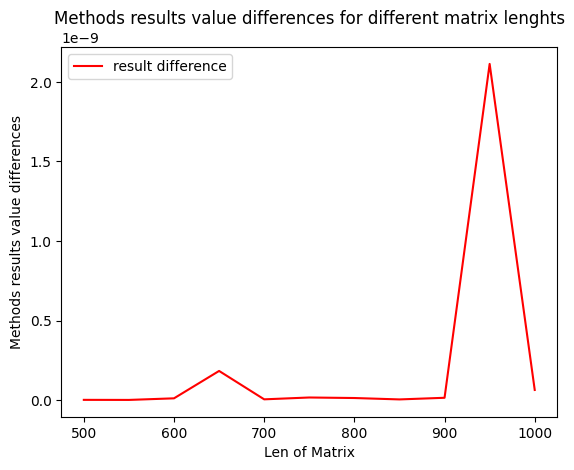

In [151]:
fig,axs = plt.subplots()
axs.plot(x_axis, diff, label="result difference",color="red") 
axs.set_xlabel('Len of Matrix')
axs.set_ylabel('Methods results value differences') 
axs.set_title("Methods results value differences for different matrix lenghts")
axs.legend() 
plt.show()

### Time comparison

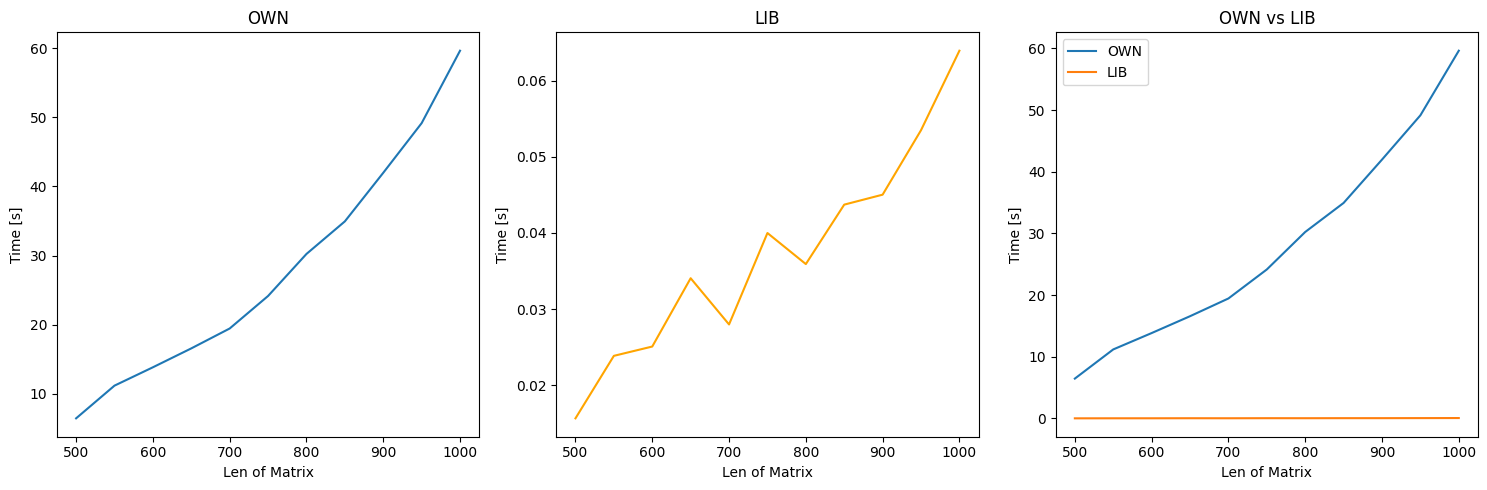

In [55]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# left
axs[0].plot(x_axis, time1)
axs[0].set_title('OWN')
axs[0].set_ylabel('Time [s]')
axs[0].set_xlabel('Len of Matrix')

# mid
axs[1].plot(x_axis, time2,color='orange')
axs[1].set_title('LIB')
axs[1].set_ylabel('Time [s]')
axs[1].set_xlabel('Len of Matrix')

# right
axs[2].plot(x_axis, time1, label='OWN')
axs[2].plot(x_axis, time2, label='LIB')
axs[2].set_title('OWN vs LIB')
axs[2].legend()
axs[2].set_ylabel('Time [s]')
axs[2].set_xlabel('Len of Matrix')

plt.tight_layout()

plt.show()

# Task 2: LU Factorization

Write and test a function that performs the LU factorization of a matrix A, such that A = LU, without pivoting. Verify the correctness of the result by computing |A - LU| . Ensure that the implementation is in-place.

The elements of the matrix L are the multiplication factors that enable the elimination of the appropriate coefficients of matrix  A during the elimination process.


### LU factorization

In [187]:
def LU(A):
  n = len(A)
  #faktoryzacja
  for j in range(n):
      for i in range(j+1, n):
        mult = A[i][j]/A[j][j]
        for k in range(j,n):
          A[i][k] -= A[j][k]*mult
        A[i][j] = mult

### Results comparision using Forbenius norm

In [ ]:
values = []
O = []
LIB = []
def LU_Check(N):
    A = np.random.rand(N, N) # random matrix
    TMP = deepcopy(A)
    try:
        start = time()
        LU(TMP)
        o_time = time() - start
        
        U = [[TMP[i][j] if i <= j else 0 for j in range(N)] for i in range(N)]
        L = [[TMP[i][j] if i > j else 1 if i == j else 0 for j in range(N)] for i in range(N)]

        start = time()
        A2 = np.dot(L, U)
        lib_time = time()-start

        values.append(N)
        LIB.append(lib_time)
        O.append(o_time)

        return np.linalg.norm(np.add(A,-A2))
    
    except ZeroDivisionError:
        return None # jak jest np. det = 0

#### Visualization

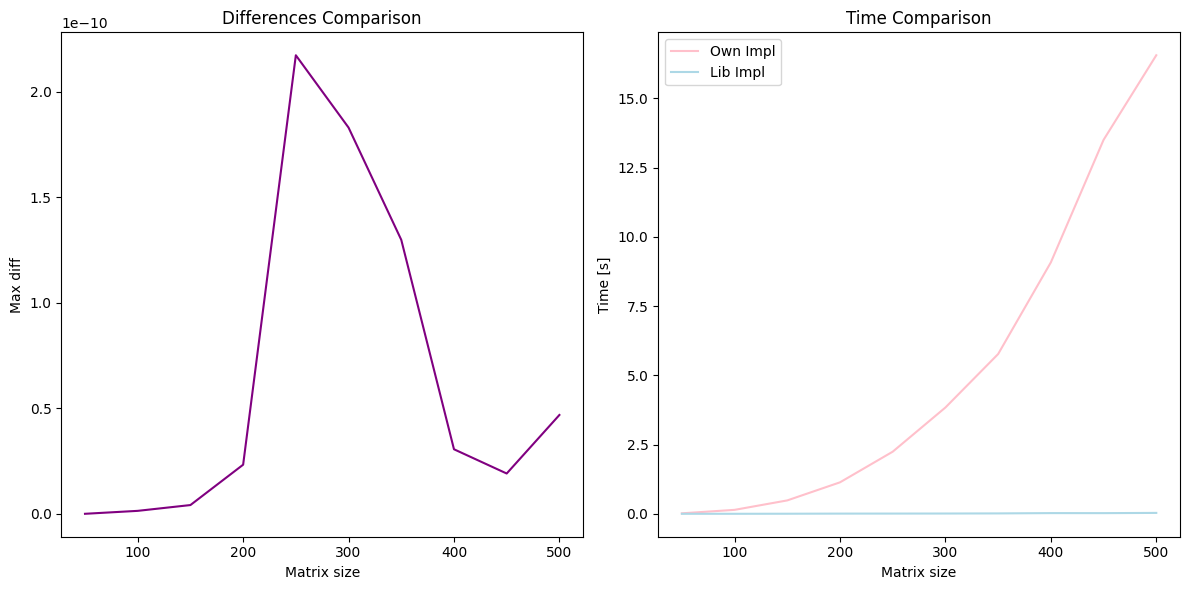

In [ ]:
results = []
for N in range(50, 501, 50):
    result = LU_Check(N)
    if result is not None:
        results.append(result)

fig, axs = plt.subplots(1, 2, figsize=(12, 6)) 

axs[0].plot(values, results, color="purple")
axs[0].set_ylabel("Max diff")
axs[0].set_xlabel("Matrix size")
axs[0].set_title("Differences Comparison")

axs[1].plot(values, O, color="pink", label="Own Impl")
axs[1].plot(values, LIB, color="lightblue", label="Lib Impl")
axs[1].set_ylabel("Time [s]")
axs[1].set_xlabel("Matrix size")
axs[1].set_title("Time Comparison")
axs[1].legend()

plt.tight_layout()
plt.show()
# robi sie w +- 1min